Program that uses all popular classification algorithms to predict handwritten digits.
- Logistic regression
- SVMs
- Decision trees
- Random forests
- KNN

Author: Michael Woll (Feb 25, 2024)

Best accuracy score was by an rbf SVM with an accuracy score of 98.9%

In [71]:
from python_environment_check import check_packages


d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] numpy 1.21.2
[OK] matplotlib 3.4.3
[OK] sklearn 1.0.2
[OK] pandas 1.3.2


In [72]:
# program using Logistic Regression to prediction hand written numbers
# author Hoan Ngo (Feb 20, 2022)
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, plot_confusion_matrix
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


X, y = datasets.load_digits(return_X_y=True)


X is the quantity of numbers in the dataset. 64 is the pixel count (8x8)

In [73]:
#explore shape of X
X.shape

(1797, 64)

In [74]:
#explore first 5 examples
print(X[:5,:])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

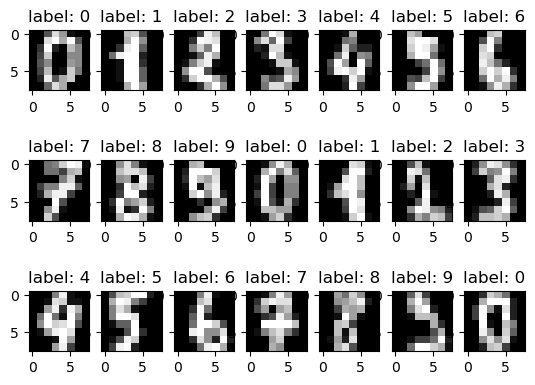

In [75]:
#plot first 21 examples with ground truth label
from matplotlib import pyplot as plt
fig = plt.figure()
for i in range(21):
    ax = fig.add_subplot(3, 7, i+1)
    ax.imshow(np.reshape(X[i,:], (8, 8)), interpolation='nearest', cmap='gray')
    ax.set_title(f'label: {y[i]}')
plt.show()

In [76]:
y.shape

(1797,)

In [77]:
print(y[:21])

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0]


In [78]:
from sklearn.model_selection import train_test_split
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
# X_test_std = scaler.fit_transform(X_test)
X_test_std = scaler.transform(X_test)

In [79]:
#print size of 
print('Quantity of pictures for each number:')
print(f'All Data {np.bincount(y)}')
print(f'Training Set {np.bincount(y_train)}')
print(f'Test Set {np.bincount(y_test)}')

Quantity of pictures for each number:
All Data [178 182 177 183 181 182 181 179 174 180]
Training Set [124 127 124 128 127 127 127 125 122 126]
Test Set [54 55 53 55 54 55 54 54 52 54]


LOGISTIC REGRESSION - 96.8519%

Execution time: 0.12167024612426758
Misclassified examples: 17
Accuracy 0.9685185185185186
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.95      0.96      0.95        55
           2       1.00      0.98      0.99        53
           3       1.00      0.96      0.98        55
           4       0.98      0.96      0.97        54
           5       0.95      0.96      0.95        55
           6       0.98      0.96      0.97        54
           7       0.98      0.98      0.98        54
           8       0.92      0.92      0.92        52
           9       0.95      0.98      0.96        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

AUC-ROC score: 0.998743933929058


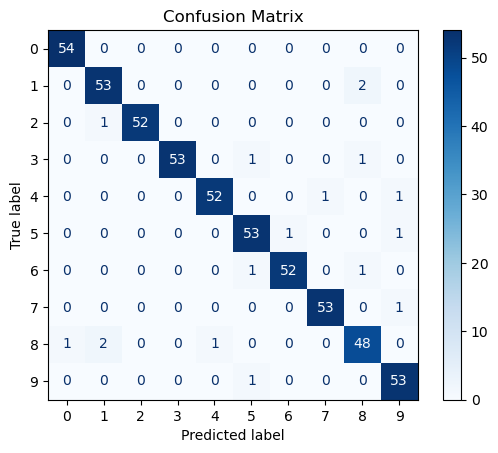

In [80]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Start timing
start_time = time.time()

lr = LogisticRegression(C=1.0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_std, y_train)

# Make predictions on the test dataset and compare with truth labels to calculate accuracy score
y_pred = lr.predict(X_test_std)

# End timing
end_time = time.time()

print(f'Execution time: {end_time-start_time}')
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy {accuracy_score(y_pred, y_test)}')
# print(f'auc-roc score {roc_auc_score(y_test, y_pred, multi_class="ovr")}')
print(classification_report(y_test, y_pred))

# Generate probabilities
y_prob = lr.predict_proba(X_test_std)
# Calculate and print auc roc score
auc_roc_score = roc_auc_score(y_test, y_prob, multi_class="ovr")
print(f'AUC-ROC score: {auc_roc_score}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues)  # You can change the color map
plt.title('Confusion Matrix')
plt.show()

SVM - Linear - 97.7778%

Execution time: 0.12056708335876465
Misclassified examples: 12
Accuracy 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.92      1.00      0.96        55
           2       1.00      1.00      1.00        53
           3       1.00      0.96      0.98        55
           4       1.00      1.00      1.00        54
           5       0.96      0.96      0.96        55
           6       0.98      1.00      0.99        54
           7       0.98      0.98      0.98        54
           8       0.96      0.88      0.92        52
           9       0.98      0.98      0.98        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

AUC-ROC score: 0.9991462836634877


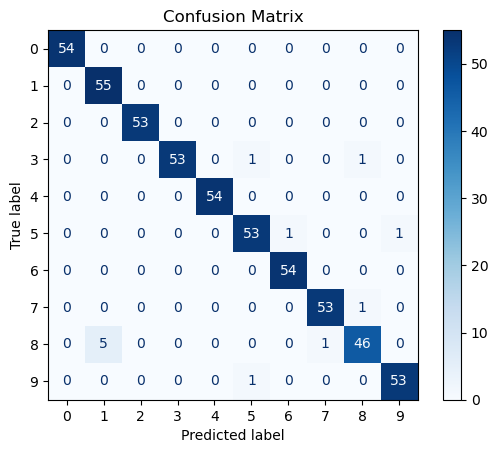

In [81]:
# SUPPORT VECTOR MACHINES
from sklearn.svm import SVC

#Start timing
start_time = time.time()

svm = SVC(kernel='linear', C=1, probability=True)
svm.fit(X_train_std, y_train)

# Make predictions on the test dataset and compare with truth labels to calculate accuracy score
y_pred = svm.predict(X_test_std)

#End timing
end_time = time.time()

print(f'Execution time: {end_time-start_time}')
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy {accuracy_score(y_pred, y_test)}')
# print(f'auc-roc score {roc_auc_score(y_test, y_pred, multi_class="ovr")}')
print(classification_report(y_test, y_pred))

# Generate probabilities
y_prob = svm.predict_proba(X_test_std)
# Calculate and print auc roc score
auc_roc_score = roc_auc_score(y_test, y_prob, multi_class="ovr")
print(f'AUC-ROC score: {auc_roc_score}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap=plt.cm.Blues)  # You can change the color map
plt.title('Confusion Matrix')
plt.show()

SVM - RBF - 98.8889%

Execution time: 0.38190412521362305
Misclassified examples: 6
Accuracy 0.9888888888888889
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        53
           3       1.00      0.96      0.98        55
           4       0.98      0.98      0.98        54
           5       0.98      0.98      0.98        55
           6       0.98      1.00      0.99        54
           7       1.00      1.00      1.00        54
           8       1.00      0.96      0.98        52
           9       0.98      1.00      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

AUC-ROC score: 0.999779059333006


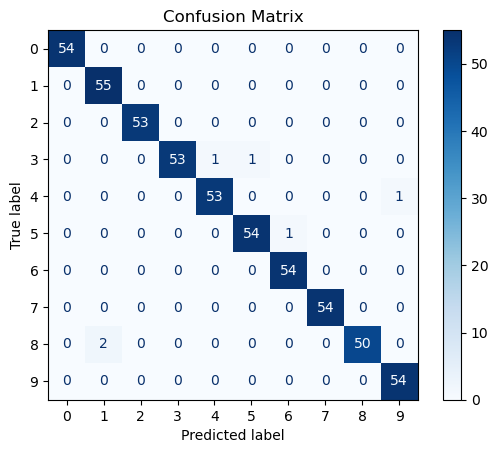

In [82]:
# SUPPORT VECTOR MACHINES
from sklearn.svm import SVC

#Start timing
start_time = time.time()

svm = SVC(kernel='rbf', C=1, probability=True)
svm.fit(X_train_std, y_train)

# Make predictions on the test dataset and compare with truth labels to calculate accuracy score
y_pred = svm.predict(X_test_std)

#End timing
end_time = time.time()

print(f'Execution time: {end_time-start_time}')
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy {accuracy_score(y_pred, y_test)}')
# print(f'auc-roc score {roc_auc_score(y_test, y_pred, multi_class="ovr")}')
print(classification_report(y_test, y_pred))

# Generate probabilities
y_prob = svm.predict_proba(X_test_std)
# Calculate and print auc roc score
auc_roc_score = roc_auc_score(y_test, y_prob, multi_class="ovr")
print(f'AUC-ROC score: {auc_roc_score}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap=plt.cm.Blues)  # You can change the color map
plt.title('Confusion Matrix')
plt.show()

DECISION TREES - 89.4444%

Execution time: 0.017941951751708984
Misclassified examples: 65
Accuracy 0.8796296296296297
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        54
           1       0.87      0.82      0.84        55
           2       0.85      0.94      0.89        53
           3       0.88      0.91      0.89        55
           4       0.82      0.83      0.83        54
           5       0.88      0.80      0.84        55
           6       0.96      0.94      0.95        54
           7       0.91      0.91      0.91        54
           8       0.82      0.81      0.82        52
           9       0.88      0.91      0.89        54

    accuracy                           0.88       540
   macro avg       0.88      0.88      0.88       540
weighted avg       0.88      0.88      0.88       540

AUC-ROC score: 0.9331581997588534


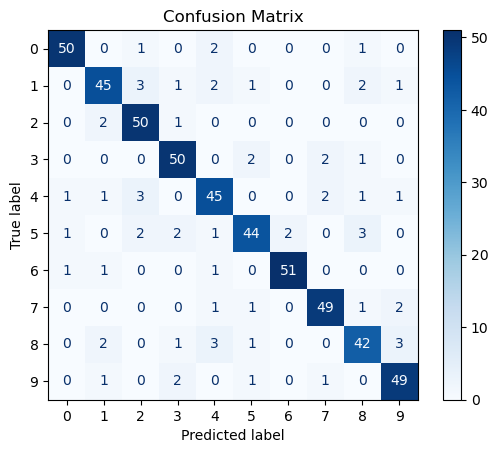

In [83]:
# DECISION TREES

from sklearn.tree import DecisionTreeClassifier

#Start timing
start_time = time.time()

tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(X_train_std, y_train)

# Make predictions on the test dataset and compare with truth labels to calculate accuracy score
y_pred = tree_model.predict(X_test_std)

#End timing
end_time = time.time()

print(f'Execution time: {end_time-start_time}')
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy {accuracy_score(y_pred, y_test)}')
# print(f'auc-roc score {roc_auc_score(y_test, y_pred, multi_class="ovr")}')
print(classification_report(y_test, y_pred))

# Generate probabilities
y_prob = tree_model.predict_proba(X_test_std)
# Calculate and print auc roc score
auc_roc_score = roc_auc_score(y_test, y_prob, multi_class="ovr")
print(f'AUC-ROC score: {auc_roc_score}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_model.classes_)
disp.plot(cmap=plt.cm.Blues)  # You can change the color map
plt.title('Confusion Matrix')
plt.show()

RANDOM FORESTS - 96.8519%

Execution time: 0.5488851070404053
Misclassified examples: 17
Accuracy 0.9685185185185186
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        53
           3       1.00      0.95      0.97        55
           4       0.96      0.94      0.95        54
           5       0.95      0.96      0.95        55
           6       0.98      0.96      0.97        54
           7       0.93      1.00      0.96        54
           8       0.96      0.92      0.94        52
           9       0.95      0.98      0.96        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

AUC-ROC score: 0.9989572976645633


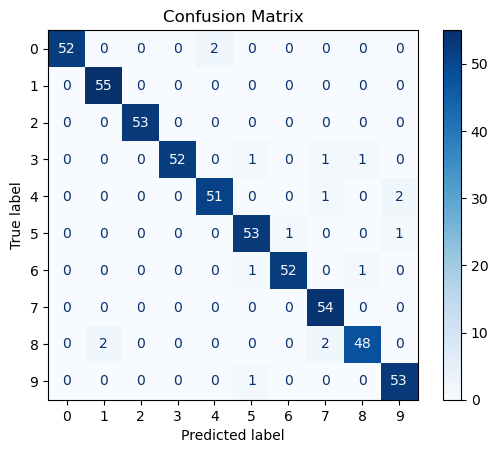

In [84]:
# RANDOM FORESTS

from sklearn.ensemble import RandomForestClassifier

'''
n_estimators: specifies the number of decision trees we use
n_jobs: specifies the number of cores in our computer to use.
'''

#Start timing
start_time = time.time()

forest = RandomForestClassifier(n_estimators=50, max_depth= None, criterion='gini')
forest.fit(X_train_std, y_train)

# Make predictions on the test dataset and compare with truth labels to calculate accuracy score
y_pred = forest.predict(X_test_std)

#End timing
end_time = time.time()

print(f'Execution time: {end_time-start_time}')
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy {accuracy_score(y_pred, y_test)}')
# print(f'auc-roc score {roc_auc_score(y_test, y_pred, multi_class="ovr")}')
print(classification_report(y_test, y_pred))

# Generate probabilities
y_prob = forest.predict_proba(X_test_std)
# Calculate and print auc roc score
auc_roc_score = roc_auc_score(y_test, y_prob, multi_class="ovr")
print(f'AUC-ROC score: {auc_roc_score}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot(cmap=plt.cm.Blues)  # You can change the color map
plt.title('Confusion Matrix')
plt.show()

K-NEAREST NEIGHBORS - 97.7778%

Execution time: 0.06610512733459473
Misclassified examples: 10
Accuracy 0.9814814814814815
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      1.00      0.97        55
           2       1.00      1.00      1.00        53
           3       0.96      0.98      0.97        55
           4       1.00      0.96      0.98        54
           5       1.00      0.96      0.98        55
           6       0.98      1.00      0.99        54
           7       0.98      1.00      0.99        54
           8       0.98      0.92      0.95        52
           9       0.96      0.98      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

AUC-ROC score: 0.9956828249252869


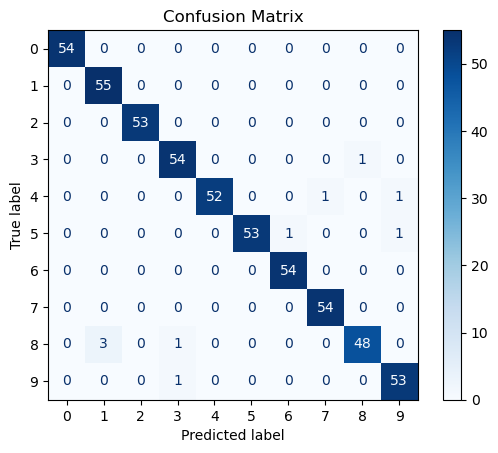

In [85]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

#Start timing
start_time = time.time()

# Minkowski is just a generalization of the Euclidean and Manhattan distance to ensure that each feature contributes equally to the distance
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')
knn.fit(X_train_std, y_train)

# Make predictions on the test dataset and compare with truth labels to calculate accuracy score
y_pred = knn.predict(X_test_std)

#End timing
end_time = time.time()

print(f'Execution time: {end_time-start_time}')
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy {accuracy_score(y_pred, y_test)}')
# print(f'auc-roc score {roc_auc_score(y_test, y_pred, multi_class="ovr")}')
print(classification_report(y_test, y_pred))

# Generate probabilities
y_prob = knn.predict_proba(X_test_std)
# Calculate and print auc roc score
auc_roc_score = roc_auc_score(y_test, y_prob, multi_class="ovr")
print(f'AUC-ROC score: {auc_roc_score}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)  # You can change the color map
plt.title('Confusion Matrix')
plt.show()

In [86]:
# All necessary imports
setup_code = """
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load and split the dataset
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
"""

# Training and prediction code for my models
training_codes = {
    'lr': """
lr = LogisticRegression(C=1.0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_std, y_train)""",
    'knn': """
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')
knn.fit(X_train_std, y_train)""",
    'svm_linear': """
svm_linear = SVC(kernel='linear', C=1, probability=True)
svm_linear.fit(X_train_std, y_train)""",
    'svm_rbf': """
svm_rbf = SVC(kernel='rbf', C=1, probability=True)
svm_rbf.fit(X_train_std, y_train)""",
    'tree': """
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(X_train_std, y_train)""",
    'forest': """
forest = RandomForestClassifier(n_estimators=50, max_depth=None, criterion='gini')
forest.fit(X_train_std, y_train)"""
}

prediction_codes = {
    'lr': """
y_pred = lr.predict(X_test_std)""",
    'knn': """
y_pred = knn.predict(X_test_std)""",
    'svm_linear': """
y_pred = svm_linear.predict(X_test_std)""",
    'svm_rbf': """
y_pred = svm_rbf.predict(X_test_std)""",
    'tree': """
y_pred = tree_model.predict(X_test_std)""",
    'forest': """
y_pred = forest.predict(X_test_std)"""
}

# Measure training and prediction times
for model_name, training_code in training_codes.items():
    training_time = timeit.timeit(stmt=training_code, setup=setup_code, number=1)
    prediction_time = timeit.timeit(stmt=prediction_codes[model_name], setup=setup_code + training_code, number=1)
    print(f"{model_name} - Training time: {training_time}, Prediction time: {prediction_time}")


lr - Training time: 0.09813741800007847, Prediction time: 0.00028100500003347406
knn - Training time: 0.00040010300017456757, Prediction time: 0.04594765700039716
svm_linear - Training time: 0.10467940899980022, Prediction time: 0.008681203000378446
svm_rbf - Training time: 0.33001948800028913, Prediction time: 0.07572915600030683
tree - Training time: 0.018813401000443264, Prediction time: 0.0003535190007823985
forest - Training time: 0.13573900499977753, Prediction time: 0.00893265699960466


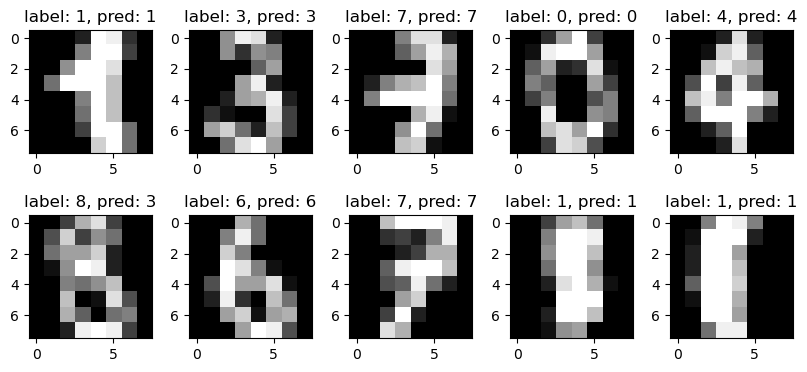

<Figure size 640x480 with 0 Axes>

In [87]:
#plot first 5 test examples with ground truth and predictions
from matplotlib import pyplot as plt
fig = plt.figure(figsize= [10, 4])
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(np.reshape(X_test[i,:], (8, 8)), interpolation='nearest', cmap='gray')
    ax.set_title(f'label: {y_test[i]}, pred: {y_pred[i]}')
    
# Adjusting the layout to add space between the two rows
plt.subplots_adjust(hspace=0.5)
plt.show()
plt.tight_layout()

In [88]:
import pandas as pd

# Define your data
data = {
    "Algorithm": ["Logistic Regression", "Linear SVM", "Kernel SVM", "Decision Tree", "Random Forest", "KNN"],
    "Execution Time (s)": [0.1217, 0.1206, 0.3819, 0.0179, 0.5489, 0.0661],
    "Misclassified Examples": [17, 12, 6, 65, 17, 10],
    "Accuracy (%)": [96.85, 97.78, 98.89, 87.96, 96.85, 98.15],
    "Precision (avg)": [0.97, 0.98, 0.99, 0.88, 0.97, 0.98],
    "Recall (avg)": [0.97, 0.98, 0.99, 0.88, 0.97, 0.98],
    "F1-Score (avg)": [0.97, 0.98, 0.99, 0.88, 0.97, 0.98],
    "AUC-ROC Score": [0.9987, 0.9991, 0.9998, 0.9332, 0.9989, 0.9957],
    "Training Time (s)": [0.0981, 0.1047, 0.3300, 0.0188, 0.1357, 0.00040],
    "Prediction Time (s)": [0.00028, 0.00868, 0.0757, 0.00035, 0.00893, 0.04595]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("ml_algorithm_performance.csv", index=False)

print("CSV file has been created successfully.")


CSV file has been created successfully.


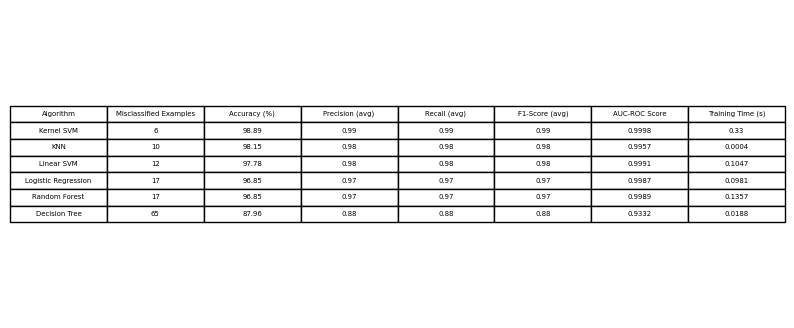

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Sample data
data = {
    "Algorithm": ["Logistic Regression", "Linear SVM", "Kernel SVM", "Decision Tree", "Random Forest", "KNN"],
    "Misclassified Examples": [17, 12, 6, 65, 17, 10],
    "Accuracy (%)": [96.85, 97.78, 98.89, 87.96, 96.85, 98.15],
    "Precision (avg)": [0.97, 0.98, 0.99, 0.88, 0.97, 0.98],
    "Recall (avg)": [0.97, 0.98, 0.99, 0.88, 0.97, 0.98],
    "F1-Score (avg)": [0.97, 0.98, 0.99, 0.88, 0.97, 0.98],
    "AUC-ROC Score": [0.9987, 0.9991, 0.9998, 0.9332, 0.9989, 0.9957],
    "Training Time (s)": [0.0981, 0.1047, 0.3300, 0.0188, 0.1357, 0.00040],
}
df = pd.DataFrame(data)
df_sorted = df.sort_values(by="Accuracy (%)", ascending=False)

# Plotting table (do not display the axis)
fig, ax = plt.subplots(figsize=(10, 4))  # set size frame
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_sorted.values, colLabels=df_sorted.columns, cellLoc = 'center', loc='center')

plt.savefig("ml_algorithm_performance.pdf", format='pdf', bbox_inches='tight')
